## Import Libraries

In [14]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our Goal: to predict the price given a set of attributes.

## Load the Data

In [15]:
from sklearn import datasets
boston = datasets.load_boston()

In [16]:
X_boston,y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [17]:
print('Keys:', boston.keys())
print('Feature names:',boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [18]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [25]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## EDA (Exploratory Data Analysis)

## Q1: Create a dataframe and Save that dataset inside it.

In [27]:
df= pd.DataFrame(boston.data,columns=boston.feature_names)
df['Price']=boston.target

## Q2: Print the head rows of the dataframe.

In [30]:
#df.columns
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Q3: Use histogram to show the distribution of House Prices.

(array([ 9., 12., 18., 37., 40., 42., 83., 71., 72., 12., 23., 18., 16.,
        14.,  7.,  1.,  5.,  5.,  2., 19.]),
 array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
        25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
        45.5 , 47.75, 50.  ]),
 <BarContainer object of 20 artists>)

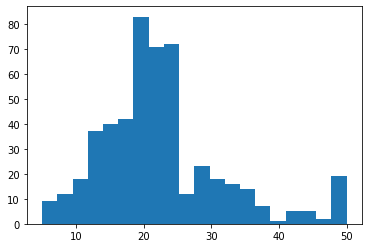

In [32]:
plt.hist(df['Price'], bins = 20)

## Q4: Use a heatmap to show the correlation between features and the target labels.

<AxesSubplot:>

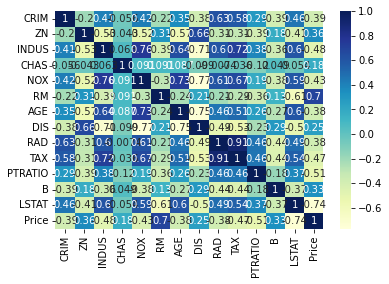

In [33]:
#sns.heatmap(boston.corr(), annot = True);
sns.heatmap(df.corr(), cmap='YlGnBu', annot= True)

## Q5: Use a lmplot to draw the relations between price and LSTAT.

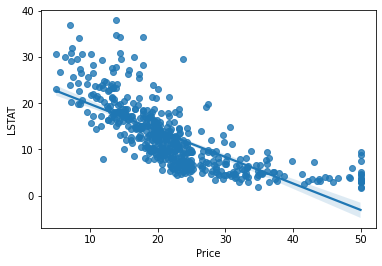

In [38]:
sns.regplot(x=df['Price'], y= df['LSTAT']);

## Q6: Use a lmplot to draw the relations between price and RM.

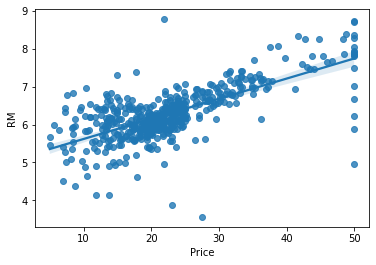

In [39]:
sns.regplot(x=df['Price'], y= df['RM']);

In [42]:
#df_boston.columns

## Q7: Split the dataset into Train and Test sets with test_size=30% and random_state=23.

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x = df [['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM',
         'AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 
         'LSTAT']]
y= df['Price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=23)

## Q8: Build a Linear Regression Model.

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lin =LinearRegression()

## Q9: Train the Model.

In [72]:
lin.fit(X_train,y_train)

LinearRegression()

## Q10: Evaluate the model. 
- print intercept and coefficients.
- compare between predictions and real values, then visualize them.
- Draw Residual Histogram.

## Residual Histogram

## Q11: Use evaluation metrics MAE, MSE, RMSE and R^2.

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))